# Toric Code Decoder Results Analysis

This notebook loads and visualizes the averaged results from multiple toric code decoder runs, comparing performance with and without loop corrections.

1-100: bad

101-200: L=[3,5,7], p=0.001:0.001:0.02, nsamples=5000, nslurm=100, max_loop_order=8

201-600: L=[9,11], p=0.001:0.001:0.02, nsamples=1000, nslurm=400, max_loop_order=8

1001-1400: L=[3,5,7,9,11], p=0.001:0.001:0.02, nsamples=1000, nslurm=400, max_loop_order=12

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

# os.chdir("/scratch/gpfs/yz4281/TNBP")

# Set style
plt.style.use('default')

# Figure parameters
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.axisbelow'] = True

In [5]:
def load_processed_data(filename="101_200_pp.npz"):
    """
    Load processed toric code data from NPZ file
    """
    data = np.load(filename)
    
    # Print summary information
    print(f"Loaded data from: {filename}")
    print(f"Date: {data['date']}")
    print(f"ID range: {data['id_range']}")
    print(f"Files processed: {data['num_files_processed']}")
    print(f"Missing files: {data['missing_files'].tolist()}")
    print(f"Unique L values: {np.unique(data['L'])}")
    print(f"p range: {data['p'].min():.6f} to {data['p'].max():.6f}")
    print(f"Number of (L,p) combinations: {len(data['L'])}")
    
    return data

In [6]:
# Load the data
data_dir = "/scratch/gpfs/yz4281/TNBP/data/250809/"
data = load_processed_data(os.path.join(data_dir, "101_200_pp.npz"))

Loaded data from: /scratch/gpfs/yz4281/TNBP/data/250809/101_200_pp.npz
Date: 250809
ID range: 101-200
Files processed: 100
Missing files: []
Unique L values: [3 5 7]
p range: 0.001000 to 0.020000
Number of (L,p) combinations: 60


In [7]:
def plot_logical_error_rates(data, save_path=None):
    """
    Plot logical error rates vs physical error rate for different L values
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Get unique L values and create colors
    L_values = np.unique(data['L'])
    colors = plt.cm.Set1(np.linspace(0, 1, len(L_values)))
    
    # Plot with loop corrections
    for i, L in enumerate(L_values):
        mask = data['L'] == L
        p_vals = data['p'][mask]
        logical_avg = data['logical_mean_loops_avg'][mask]
        logical_std = data['logical_mean_loops_std'][mask]
        
        ax1.errorbar(p_vals, logical_avg, yerr=logical_std, 
                    label=f'L = {L}', marker='o', color=colors[i], 
                    capsize=3, capthick=1)
    
    ax1.set_xlabel('Physical error rate p')
    ax1.set_ylabel('Logical error rate')
    ax1.set_ylim(1e-6, 1e-1)
    ax1.set_title('With Loop Corrections')
    ax1.set_yscale('log')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Plot without loop corrections
    for i, L in enumerate(L_values):
        mask = data['L'] == L
        p_vals = data['p'][mask]
        logical_avg = data['logical_mean_no_loops_avg'][mask]
        logical_std = data['logical_mean_no_loops_std'][mask]
        
        ax2.errorbar(p_vals, logical_avg, yerr=logical_std, 
                    label=f'L = {L}', marker='s', color=colors[i], 
                    capsize=3, capthick=1)
    
    ax2.set_xlabel('Physical error rate p')
    ax2.set_ylabel('Logical error rate')
    ax2.set_title('Without Loop Corrections')
    ax2.set_yscale('log')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    plt.suptitle('Toric Code Logical Error Rates', fontsize=18)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

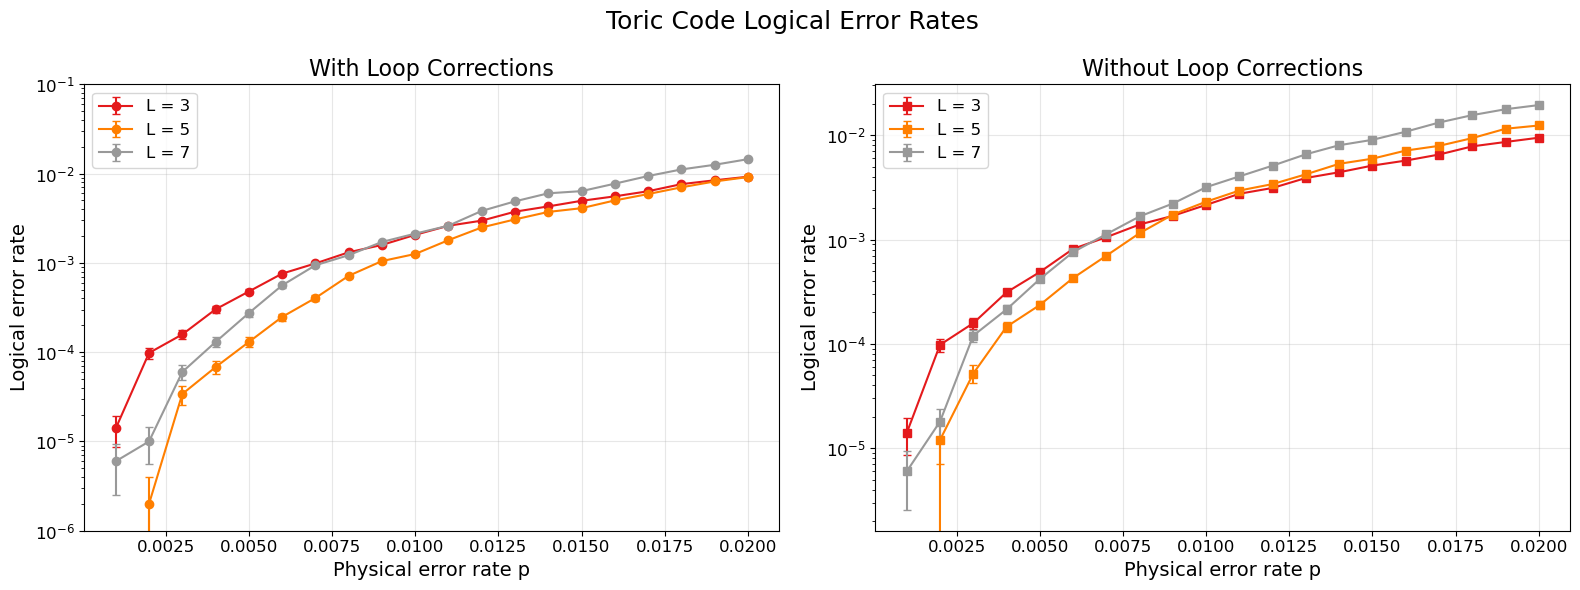

In [8]:
# Plot logical error rates
plot_logical_error_rates(data, save_path="logical_error_rates.png")

In [9]:
def plot_failure_rates(data, save_path=None):
    """
    Plot syndrome failure rates vs physical error rate for different L values
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Get unique L values and create colors
    L_values = np.unique(data['L'])
    colors = plt.cm.Set1(np.linspace(0, 1, len(L_values)))
    
    # Plot with loop corrections
    for i, L in enumerate(L_values):
        mask = data['L'] == L
        p_vals = data['p'][mask]
        failure_avg = data['failure_mean_loops_avg'][mask]
        failure_std = data['failure_mean_loops_std'][mask]
        
        ax1.errorbar(p_vals, failure_avg, yerr=failure_std, 
                    label=f'L = {L}', marker='o', color=colors[i], 
                    capsize=3, capthick=1)
    
    ax1.set_ylim(1e-6, 1e-1)
    ax1.set_xlabel('Physical error rate p')
    ax1.set_ylabel('Syndrome failure rate')
    ax1.set_title('With Loop Corrections')
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Plot without loop corrections
    for i, L in enumerate(L_values):
        mask = data['L'] == L
        p_vals = data['p'][mask]
        failure_avg = data['failure_mean_no_loops_avg'][mask]
        failure_std = data['failure_mean_no_loops_std'][mask]
        
        ax2.errorbar(p_vals, failure_avg, yerr=failure_std, 
                    label=f'L = {L}', marker='s', color=colors[i], 
                    capsize=3, capthick=1)
    
    ax2.set_xlabel('Physical error rate p')
    ax2.set_ylabel('Syndrome failure rate')
    ax2.set_title('Without Loop Corrections')
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    plt.suptitle('Toric Code Syndrome Failure Rates', fontsize=18)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

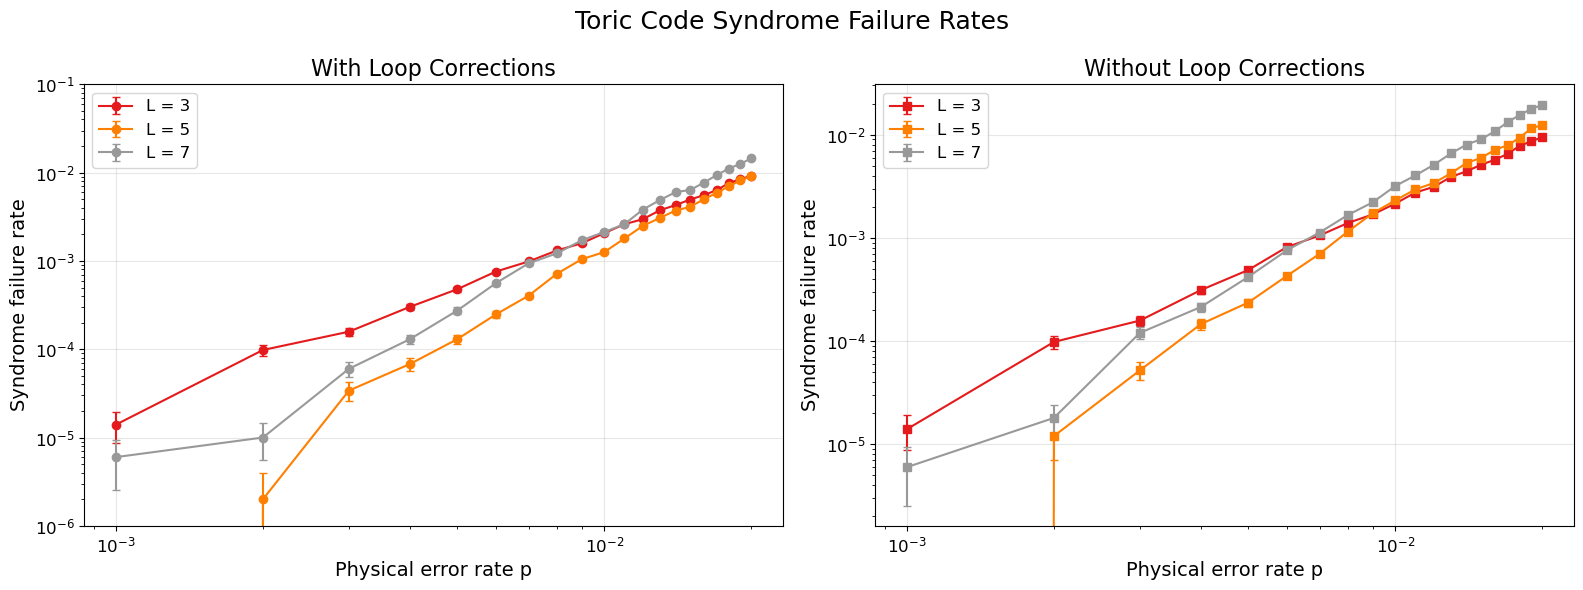

In [10]:
# Plot failure rates
plot_failure_rates(data, save_path="failure_rates.png")

In [11]:
def plot_comparison_by_L(data, save_path=None):
    """
    Direct comparison between loop and no-loop methods for each L value
    """
    L_values = np.unique(data['L'])
    n_L = len(L_values)
    
    fig, axes = plt.subplots(2, n_L, figsize=(5*n_L, 10))
    if n_L == 1:
        axes = axes.reshape(2, 1)
    
    colors = ['#1f77b4', '#ff7f0e']  # Blue for loops, orange for no loops
    
    for i, L in enumerate(L_values):
        mask = data['L'] == L
        p_vals = data['p'][mask]
        
        # Logical error rates comparison
        axes[0, i].errorbar(p_vals, data['logical_mean_loops_avg'][mask], 
                           yerr=data['logical_mean_loops_std'][mask],
                           label='With loops', marker='o', color=colors[0], 
                           capsize=3, capthick=1)
        axes[0, i].errorbar(p_vals, data['logical_mean_no_loops_avg'][mask], 
                           yerr=data['logical_mean_no_loops_std'][mask],
                           label='Without loops', marker='s', color=colors[1], 
                           capsize=3, capthick=1)

        axes[0, i].set_ylim(1e-6, 1e-1)
        axes[0, i].set_xlabel('Physical error rate p')
        axes[0, i].set_ylabel('Logical error rate')
        axes[0, i].set_title(f'L = {L} - Logical Errors')
        axes[0, i].set_xscale('log')
        axes[0, i].set_yscale('log')
        axes[0, i].grid(True, alpha=0.3)
        axes[0, i].legend()
        
        # Failure rates comparison
        axes[1, i].errorbar(p_vals, data['failure_mean_loops_avg'][mask], 
                           yerr=data['failure_mean_loops_std'][mask],
                           label='With loops', marker='o', color=colors[0], 
                           capsize=3, capthick=1)
        axes[1, i].errorbar(p_vals, data['failure_mean_no_loops_avg'][mask], 
                           yerr=data['failure_mean_no_loops_std'][mask],
                           label='Without loops', marker='s', color=colors[1], 
                           capsize=3, capthick=1)
        
        axes[1, i].set_ylim(1e-6, 1e-1)
        axes[1, i].set_xlabel('Physical error rate p')
        axes[1, i].set_ylabel('Syndrome failure rate')
        axes[1, i].set_title(f'L = {L} - Syndrome Failures')
        axes[1, i].set_xscale('log')
        axes[1, i].set_yscale('log')
        axes[1, i].grid(True, alpha=0.3)
        axes[1, i].legend()
    
    plt.suptitle('Loop vs No-Loop Decoder Comparison', fontsize=18)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

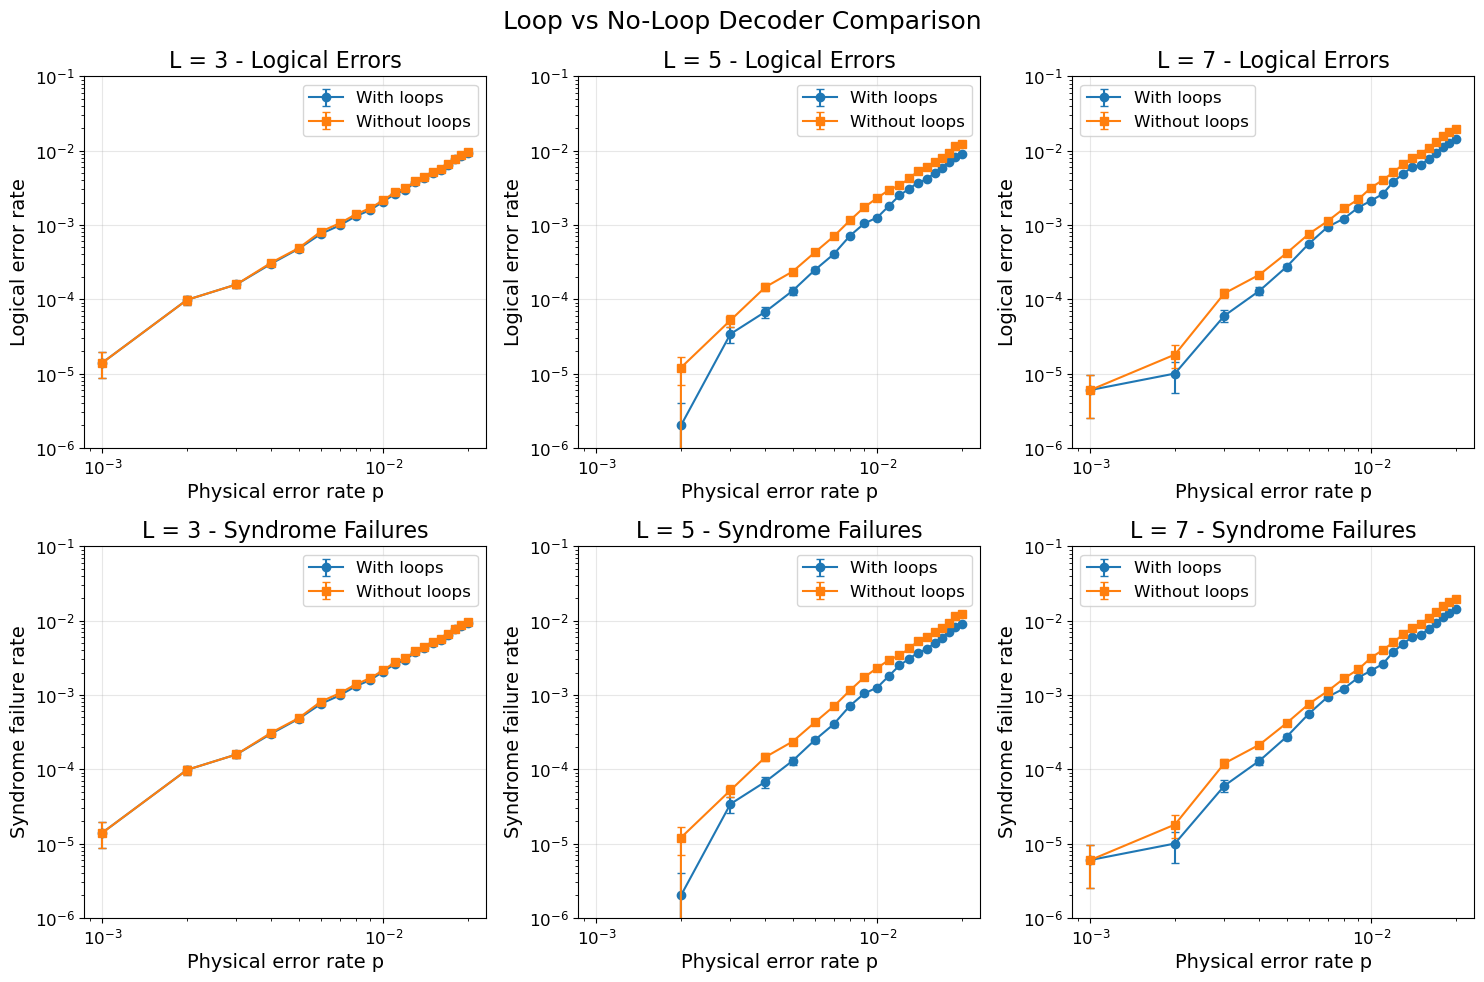

In [12]:
# Plot direct comparisons
plot_comparison_by_L(data, save_path="loop_vs_no_loop_comparison.png")

In [13]:
def plot_improvement_ratio(data, save_path=None):
    """
    Plot the improvement ratio (no_loops / with_loops) to quantify performance gain
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    L_values = np.unique(data['L'])
    colors = plt.cm.Set1(np.linspace(0, 1, len(L_values)))
    
    for i, L in enumerate(L_values):
        mask = data['L'] == L
        p_vals = data['p'][mask]
        
        # Logical error improvement ratio
        logical_loops = data['logical_mean_loops_avg'][mask]
        logical_no_loops = data['logical_mean_no_loops_avg'][mask]
        
        # Avoid division by zero
        ratio_logical = np.where(logical_loops > 0, logical_no_loops / logical_loops, 1)
        
        ax1.plot(p_vals, ratio_logical, label=f'L = {L}', marker='o', color=colors[i])
        
        # Failure rate improvement ratio
        failure_loops = data['failure_mean_loops_avg'][mask]
        failure_no_loops = data['failure_mean_no_loops_avg'][mask]
        
        ratio_failure = np.where(failure_loops > 0, failure_no_loops / failure_loops, 1)
        
        ax2.plot(p_vals, ratio_failure, label=f'L = {L}', marker='s', color=colors[i])
    
    # Add horizontal line at ratio = 1 (no improvement)
    ax1.axhline(y=1, color='black', linestyle='--', alpha=0.5, label='No improvement')
    ax2.axhline(y=1, color='black', linestyle='--', alpha=0.5, label='No improvement')
    
    ax1.set_xlabel('Physical error rate p')
    ax1.set_ylabel('Improvement ratio (no loops / with loops)')
    ax1.set_title('Logical Error Rate Improvement')
    ax1.set_yscale('log')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    ax2.set_xlabel('Physical error rate p')
    ax2.set_ylabel('Improvement ratio (no loops / with loops)')
    ax2.set_title('Syndrome Failure Rate Improvement')
    ax2.set_yscale('log')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    plt.suptitle('Performance Improvement with Loop Corrections\n(Ratio > 1 means loops help)', fontsize=18)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

/tmp/ipykernel_518343/3058029419.py:19: RuntimeWarning: invalid value encountered in divide
  ratio_logical = np.where(logical_loops > 0, logical_no_loops / logical_loops, 1)
/tmp/ipykernel_518343/3058029419.py:27: RuntimeWarning: invalid value encountered in divide
  ratio_failure = np.where(failure_loops > 0, failure_no_loops / failure_loops, 1)


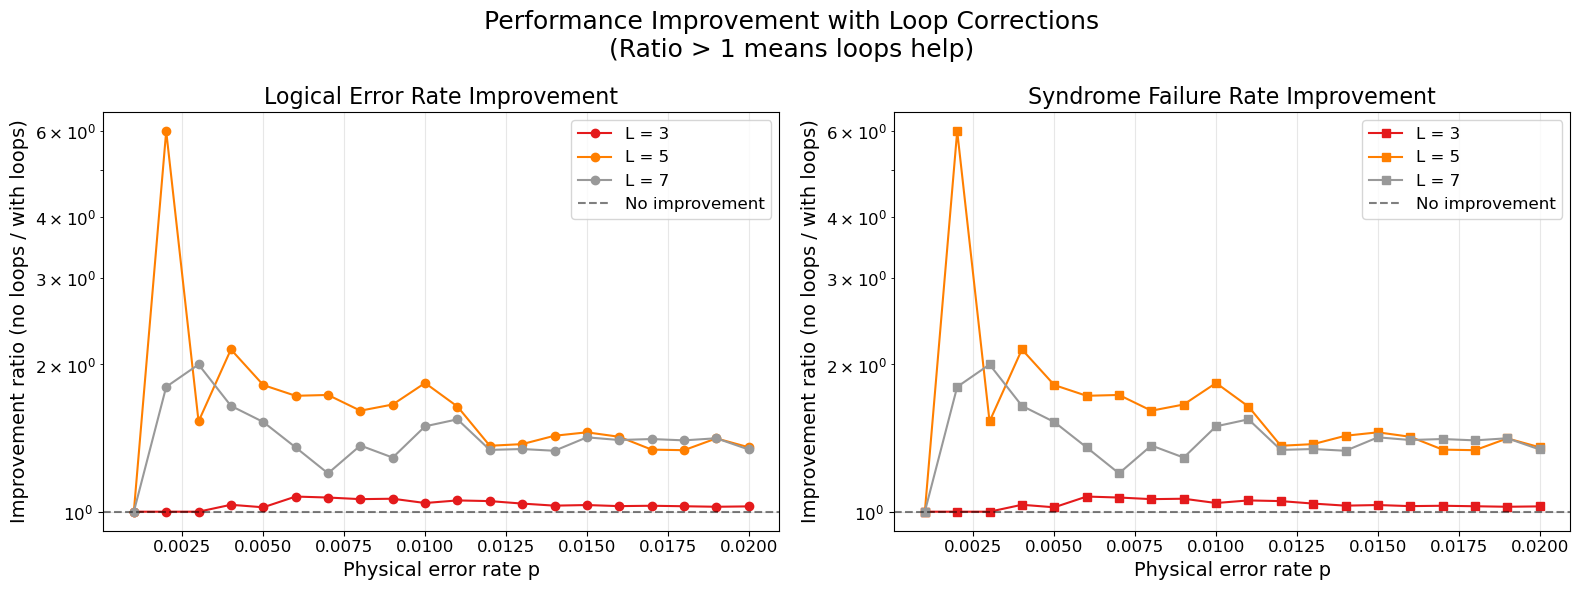

In [14]:
# Plot improvement ratios
plot_improvement_ratio(data, save_path="improvement_ratios.png")

In [15]:
def print_summary_statistics(data):
    """
    Print summary statistics for the dataset
    """
    print("\n" + "="*60)
    print("SUMMARY STATISTICS")
    print("="*60)
    
    L_values = np.unique(data['L'])
    
    for L in L_values:
        mask = data['L'] == L
        print(f"\nL = {L}:")
        print(f"  Number of p values: {np.sum(mask)}")
        print(f"  p range: {data['p'][mask].min():.6f} to {data['p'][mask].max():.6f}")
        
        # Average performance across all p values
        logical_loops_avg = np.mean(data['logical_mean_loops_avg'][mask])
        logical_no_loops_avg = np.mean(data['logical_mean_no_loops_avg'][mask])
        failure_loops_avg = np.mean(data['failure_mean_loops_avg'][mask])
        failure_no_loops_avg = np.mean(data['failure_mean_no_loops_avg'][mask])
        
        print(f"  Average logical error rate (with loops): {logical_loops_avg:.6f}")
        print(f"  Average logical error rate (no loops): {logical_no_loops_avg:.6f}")
        print(f"  Average syndrome failure rate (with loops): {failure_loops_avg:.6f}")
        print(f"  Average syndrome failure rate (no loops): {failure_no_loops_avg:.6f}")
        
        # Improvement factors
        if logical_loops_avg > 0:
            logical_improvement = logical_no_loops_avg / logical_loops_avg
            print(f"  Logical error improvement factor: {logical_improvement:.2f}x")
        
        if failure_loops_avg > 0:
            failure_improvement = failure_no_loops_avg / failure_loops_avg
            print(f"  Syndrome failure improvement factor: {failure_improvement:.2f}x")

In [16]:
# Print summary statistics
print_summary_statistics(data)


SUMMARY STATISTICS

L = 3:
  Number of p values: 20
  p range: 0.001000 to 0.020000
  Average logical error rate (with loops): 0.003175
  Average logical error rate (no loops): 0.003280
  Average syndrome failure rate (with loops): 0.003175
  Average syndrome failure rate (no loops): 0.003280
  Logical error improvement factor: 1.03x
  Syndrome failure improvement factor: 1.03x

L = 5:
  Number of p values: 20
  p range: 0.001000 to 0.020000
  Average logical error rate (with loops): 0.002717
  Average logical error rate (no loops): 0.003848
  Average syndrome failure rate (with loops): 0.002717
  Average syndrome failure rate (no loops): 0.003848
  Logical error improvement factor: 1.42x
  Syndrome failure improvement factor: 1.42x

L = 7:
  Number of p values: 20
  p range: 0.001000 to 0.020000
  Average logical error rate (with loops): 0.004302
  Average logical error rate (no loops): 0.005964
  Average syndrome failure rate (with loops): 0.004302
  Average syndrome failure rate (n

## Data Export

Export key results to CSV for further analysis or publication.

In [17]:
# def export_results_to_csv(data, filename="processed_results.csv"):
#     """
#     Export the processed results to CSV format
#     """
#     import csv
    
#     with open(filename, 'w', newline='') as csvfile:
#         fieldnames = ['L', 'p', 'logical_loops_avg', 'logical_loops_std', 
#                      'failure_loops_avg', 'failure_loops_std',
#                      'logical_no_loops_avg', 'logical_no_loops_std',
#                      'failure_no_loops_avg', 'failure_no_loops_std']
        
#         writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#         writer.writeheader()
        
#         for i in range(len(data['L'])):
#             writer.writerow({
#                 'L': data['L'][i],
#                 'p': data['p'][i],
#                 'logical_loops_avg': data['logical_mean_loops_avg'][i],
#                 'logical_loops_std': data['logical_mean_loops_std'][i],
#                 'failure_loops_avg': data['failure_mean_loops_avg'][i],
#                 'failure_loops_std': data['failure_mean_loops_std'][i],
#                 'logical_no_loops_avg': data['logical_mean_no_loops_avg'][i],
#                 'logical_no_loops_std': data['logical_mean_no_loops_std'][i],
#                 'failure_no_loops_avg': data['failure_mean_no_loops_avg'][i],
#                 'failure_no_loops_std': data['failure_mean_no_loops_std'][i]
#             })
    
#     print(f"Results exported to {filename}")

# # Export results
# export_results_to_csv(data, "toric_code_averaged_results.csv")

Results exported to toric_code_averaged_results.csv


## Combined Dataset Analysis

Load and analyze both datasets together to compare performance across all L values (3, 5, 7, 9, 11).

In [18]:
def load_and_combine_datasets(filenames, data_dir="/scratch/gpfs/yz4281/TNBP/data/250809/"):
    """
    Load multiple NPZ files and combine them into a single dataset
    
    Parameters:
    - filenames: list of NPZ filenames to load
    - data_dir: directory containing the NPZ files
    
    Returns:
    - combined_data: dictionary with combined data arrays
    """
    all_data = []
    
    for filename in filenames:
        filepath = os.path.join(data_dir, filename)
        print(f"Loading {filename}...")
        data = np.load(filepath)
        
        # Print info for each file
        print(f"  - Date: {data['date']}")
        print(f"  - ID range: {data['id_range']}")
        print(f"  - Files processed: {data['num_files_processed']}")
        print(f"  - L values: {np.unique(data['L'])}")
        print(f"  - p range: {data['p'].min():.6f} to {data['p'].max():.6f}")
        print()
        
        all_data.append(data)
    
    # Combine all arrays
    combined_data = {}
    array_keys = ['L', 'p', 'logical_mean_loops_avg', 'logical_mean_loops_std',
                  'failure_mean_loops_avg', 'failure_mean_loops_std',
                  'logical_mean_no_loops_avg', 'logical_mean_no_loops_std',
                  'failure_mean_no_loops_avg', 'failure_mean_no_loops_std']
    
    for key in array_keys:
        combined_data[key] = np.concatenate([data[key] for data in all_data])
    
    # Combine metadata
    combined_data['num_files_processed'] = sum(data['num_files_processed'] for data in all_data)
    combined_data['missing_files'] = np.concatenate([data['missing_files'] for data in all_data])
    combined_data['date'] = all_data[0]['date']  # Assume same date
    combined_data['id_ranges'] = [str(data['id_range']) for data in all_data]
    
    # Add total samples info if available
    if 'total_samples_per_point' in all_data[0]:
        combined_data['total_samples_per_point'] = all_data[0]['total_samples_per_point']
    
    print("="*50)
    print("COMBINED DATASET SUMMARY:")
    print(f"Total files processed: {combined_data['num_files_processed']}")
    print(f"Combined L values: {np.unique(combined_data['L'])}")
    print(f"Combined p range: {combined_data['p'].min():.6f} to {combined_data['p'].max():.6f}")
    print(f"Total (L,p) combinations: {len(combined_data['L'])}")
    print(f"ID ranges: {', '.join(combined_data['id_ranges'])}")
    
    return combined_data

In [19]:
# Load and combine both datasets
filenames = ["101_200_pp.npz", "201_600_pp.npz"]
combined_data = load_and_combine_datasets(filenames)

Loading 101_200_pp.npz...
  - Date: 250809
  - ID range: 101-200
  - Files processed: 100
  - L values: [3 5 7]
  - p range: 0.001000 to 0.020000

Loading 201_600_pp.npz...
  - Date: 250809
  - ID range: 201-600
  - Files processed: 400
  - L values: [ 9 11]
  - p range: 0.001000 to 0.020000

COMBINED DATASET SUMMARY:
Total files processed: 500
Combined L values: [ 3  5  7  9 11]
Combined p range: 0.001000 to 0.020000
Total (L,p) combinations: 100
ID ranges: 101-200, 201-600


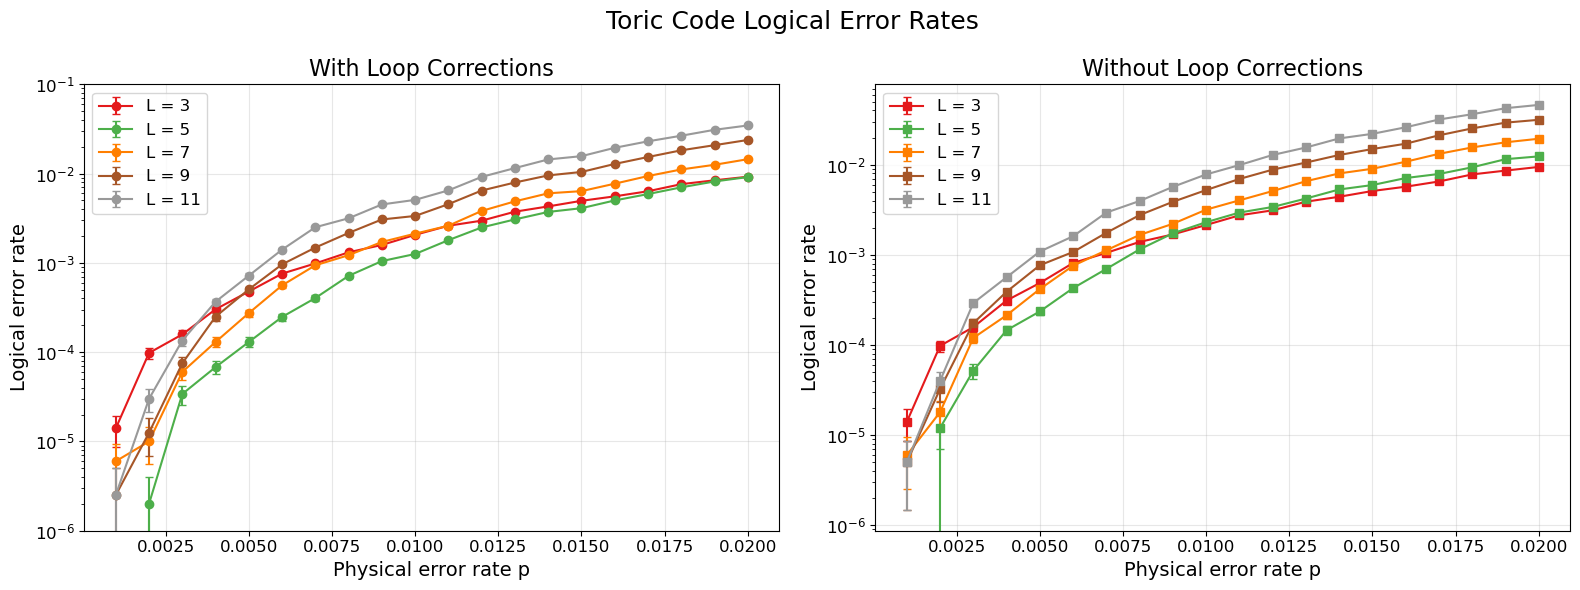

In [20]:
# Plot logical error rates for combined dataset
plot_logical_error_rates(combined_data, save_path="combined_logical_error_rates.png")

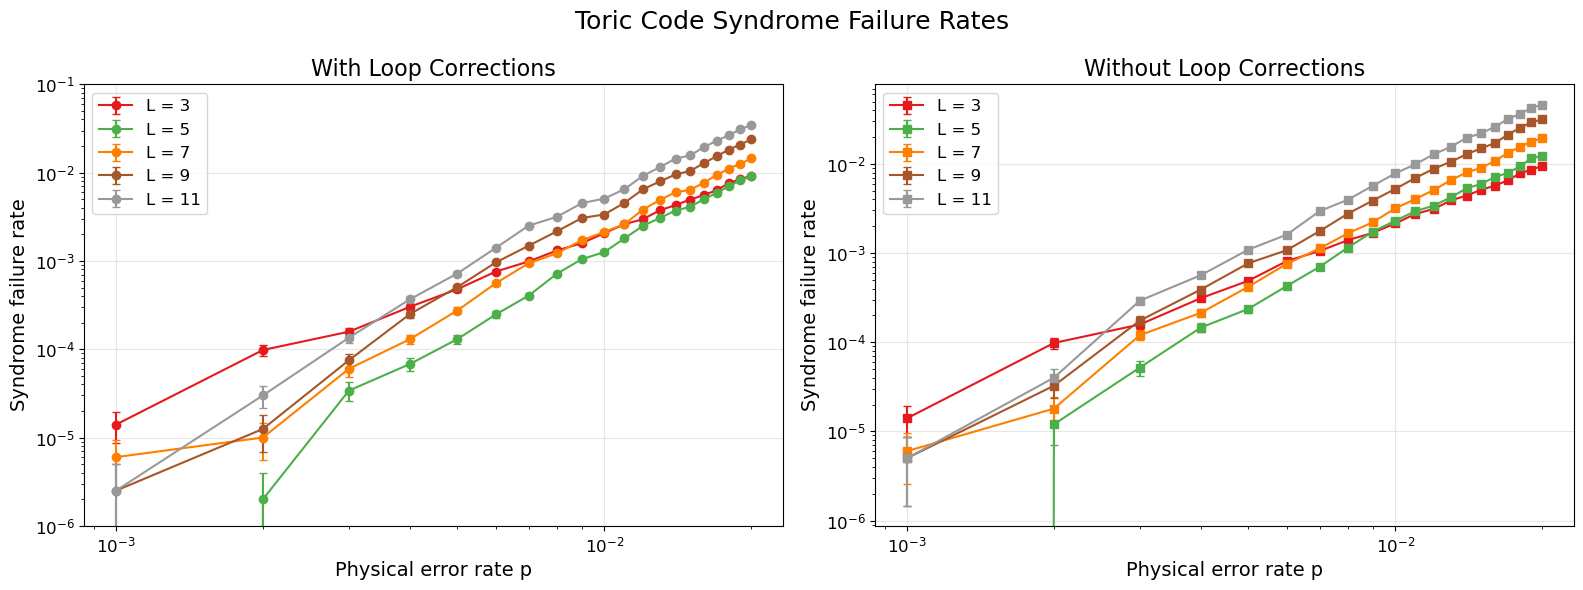

In [21]:
# Plot failure rates for combined dataset
plot_failure_rates(combined_data, save_path="combined_failure_rates.png")

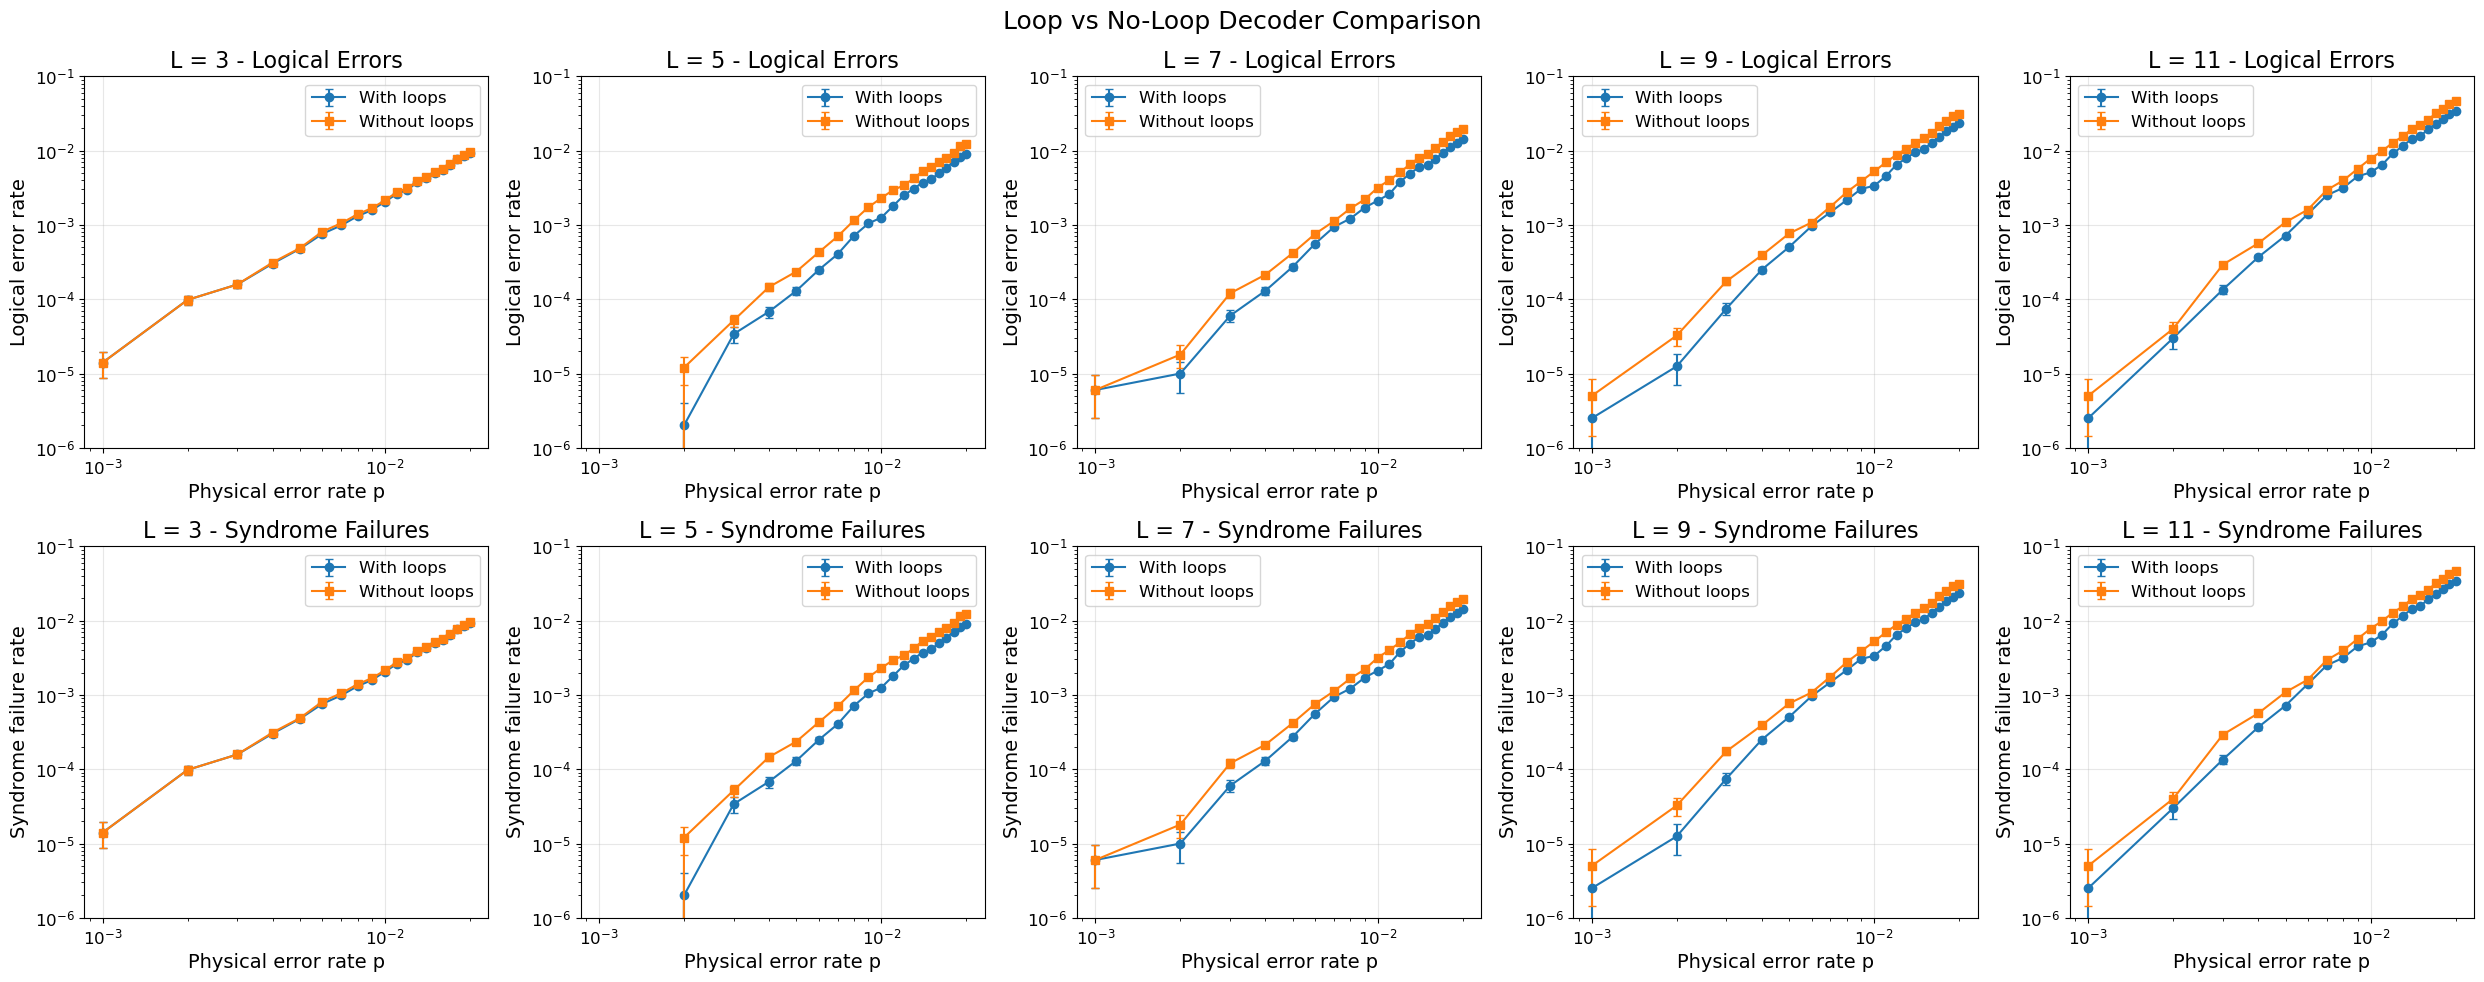

In [22]:
# Plot direct comparisons for all L values
plot_comparison_by_L(combined_data, save_path="combined_loop_vs_no_loop_comparison.png")

/tmp/ipykernel_518343/3058029419.py:19: RuntimeWarning: invalid value encountered in divide
  ratio_logical = np.where(logical_loops > 0, logical_no_loops / logical_loops, 1)
/tmp/ipykernel_518343/3058029419.py:27: RuntimeWarning: invalid value encountered in divide
  ratio_failure = np.where(failure_loops > 0, failure_no_loops / failure_loops, 1)


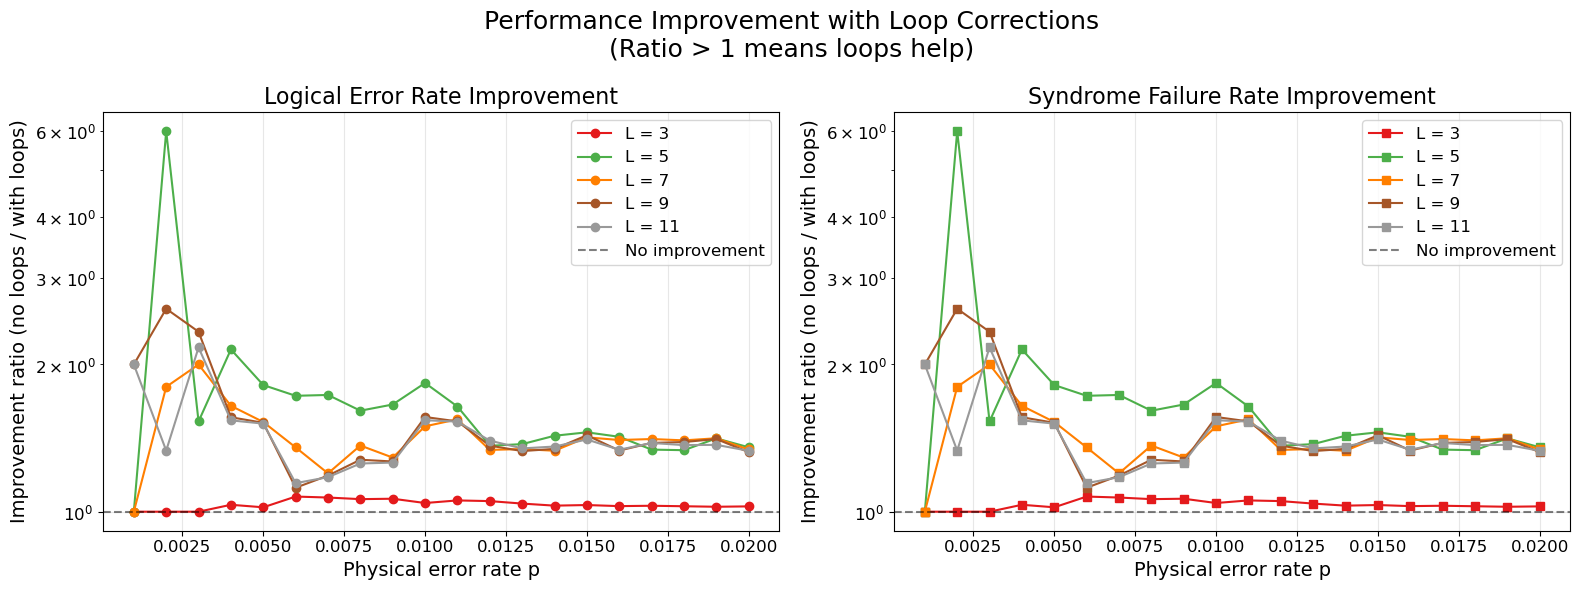

In [23]:
# Plot improvement ratios for combined dataset
plot_improvement_ratio(combined_data, save_path="combined_improvement_ratios.png")

In [24]:
# Print summary statistics for combined dataset
print_summary_statistics(combined_data)


SUMMARY STATISTICS

L = 3:
  Number of p values: 20
  p range: 0.001000 to 0.020000
  Average logical error rate (with loops): 0.003175
  Average logical error rate (no loops): 0.003280
  Average syndrome failure rate (with loops): 0.003175
  Average syndrome failure rate (no loops): 0.003280
  Logical error improvement factor: 1.03x
  Syndrome failure improvement factor: 1.03x

L = 5:
  Number of p values: 20
  p range: 0.001000 to 0.020000
  Average logical error rate (with loops): 0.002717
  Average logical error rate (no loops): 0.003848
  Average syndrome failure rate (with loops): 0.002717
  Average syndrome failure rate (no loops): 0.003848
  Logical error improvement factor: 1.42x
  Syndrome failure improvement factor: 1.42x

L = 7:
  Number of p values: 20
  p range: 0.001000 to 0.020000
  Average logical error rate (with loops): 0.004302
  Average logical error rate (no loops): 0.005964
  Average syndrome failure rate (with loops): 0.004302
  Average syndrome failure rate (n

In [25]:
def plot_threshold_analysis(data, save_path=None):
    """
    Create plots specifically for threshold analysis and finite-size scaling
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    L_values = np.unique(data['L'])
    colors = plt.cm.viridis(np.linspace(0, 1, len(L_values)))
    
    # 1. Logical error rates vs p (linear scale for threshold identification)
    for i, L in enumerate(L_values):
        mask = data['L'] == L
        p_vals = data['p'][mask]
        logical_loops = data['logical_mean_loops_avg'][mask]
        logical_no_loops = data['logical_mean_no_loops_avg'][mask]
        
        ax1.plot(p_vals, logical_loops, 'o-', color=colors[i], label=f'L={L} (loops)', linewidth=2)
        ax1.plot(p_vals, logical_no_loops, 's--', color=colors[i], label=f'L={L} (no loops)', alpha=0.7)
    
    ax1.set_xlabel('Physical error rate p')
    ax1.set_ylabel('Logical error rate')
    ax1.set_title('Threshold Identification (Linear Scale)')
    ax1.grid(True, alpha=0.3)
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.set_ylim(0, 0.5)
    
    # 2. Log-log plot for power-law scaling
    for i, L in enumerate(L_values):
        mask = data['L'] == L
        p_vals = data['p'][mask]
        logical_loops = data['logical_mean_loops_avg'][mask]
        
        # Only plot points where logical error rate > 0
        valid_mask = logical_loops > 0
        if np.any(valid_mask):
            ax2.loglog(p_vals[valid_mask], logical_loops[valid_mask], 'o-', 
                      color=colors[i], label=f'L={L}', linewidth=2)
    
    ax2.set_xlabel('Physical error rate p')
    ax2.set_ylabel('Logical error rate')
    ax2.set_title('Power-law Scaling (Log-log)')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # 3. Finite-size scaling plot (crossing point analysis)
    # Plot logical error rate vs L for different p values
    p_values_to_plot = [0.005, 0.010, 0.015, 0.020]  # Select representative p values
    p_colors = plt.cm.plasma(np.linspace(0, 1, len(p_values_to_plot)))
    
    for i, p_target in enumerate(p_values_to_plot):
        logical_at_p = []
        L_for_p = []
        
        for L in L_values:
            mask = data['L'] == L
            p_vals = data['p'][mask]
            logical_vals = data['logical_mean_loops_avg'][mask]
            
            # Find closest p value to target
            if len(p_vals) > 0:
                closest_idx = np.argmin(np.abs(p_vals - p_target))
                if np.abs(p_vals[closest_idx] - p_target) < 0.001:  # Within 0.1% tolerance
                    logical_at_p.append(logical_vals[closest_idx])
                    L_for_p.append(L)
        
        if len(logical_at_p) > 1:
            ax3.plot(L_for_p, logical_at_p, 'o-', color=p_colors[i], 
                    label=f'p={p_target:.3f}', linewidth=2, markersize=8)
    
    ax3.set_xlabel('System size L')
    ax3.set_ylabel('Logical error rate')
    ax3.set_title('Finite-size Scaling')
    ax3.grid(True, alpha=0.3)
    ax3.legend()
    ax3.set_yscale('log')
    
    # 4. Improvement factor vs L
    for i, L in enumerate(L_values):
        mask = data['L'] == L
        p_vals = data['p'][mask]
        logical_loops = data['logical_mean_loops_avg'][mask]
        logical_no_loops = data['logical_mean_no_loops_avg'][mask]
        
        # Calculate average improvement factor
        improvement_factors = logical_no_loops / np.maximum(logical_loops, 1e-10)
        avg_improvement = np.mean(improvement_factors)
        
        ax4.bar(L, avg_improvement, color=colors[i], alpha=0.7, 
               label=f'L={L}: {avg_improvement:.1f}x')
    
    ax4.set_xlabel('System size L')
    ax4.set_ylabel('Average improvement factor')
    ax4.set_title('Loop Correction Effectiveness vs System Size')
    ax4.grid(True, alpha=0.3)
    ax4.legend()
    ax4.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='No improvement')
    
    plt.suptitle('Threshold and Finite-Size Scaling Analysis', fontsize=16)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

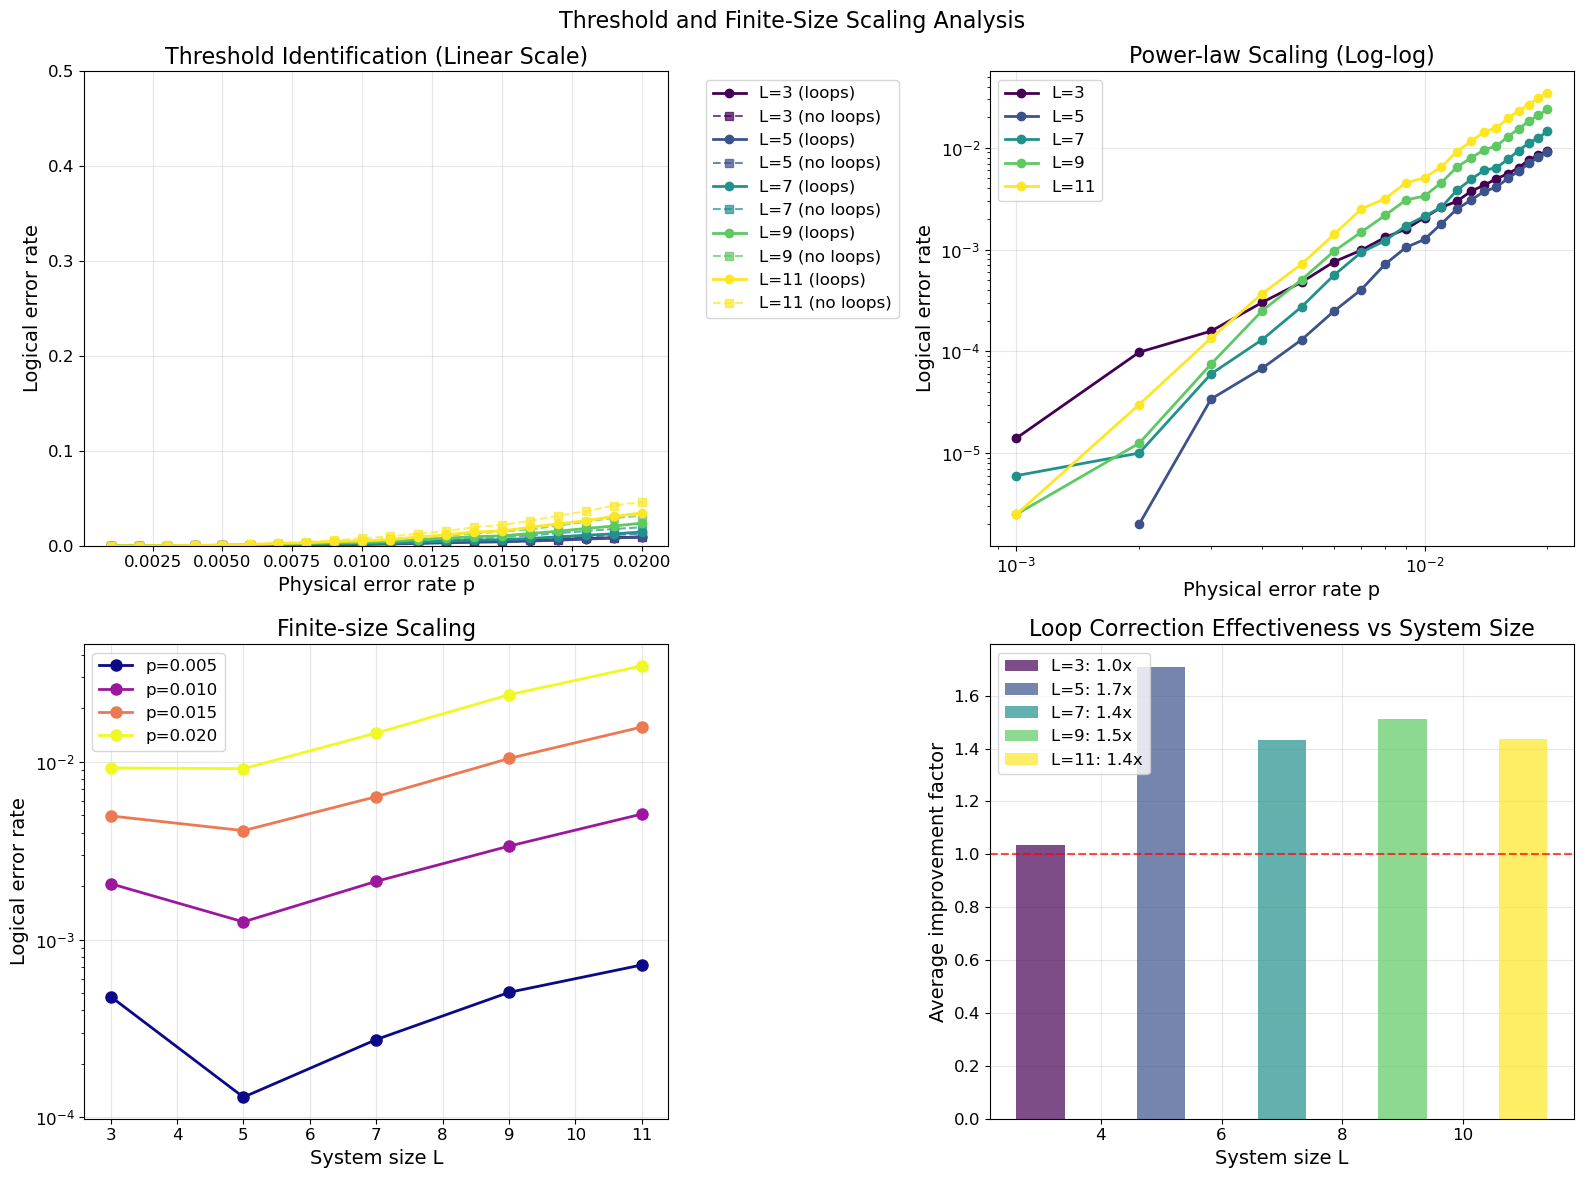

In [26]:
# Plot threshold analysis for combined dataset
plot_threshold_analysis(combined_data, save_path="combined_threshold_analysis.png")